# **Dataset of types of dry beans**



> This dataset contains images of 13,611 seeds from 7 different types of dry beans. These seeds were photographed with a high-resolution camera, and then with the help of a computer vision system, images were processed and various features were extracted from each seed. These features include 12 dimensions and 4 different shapes.




> The main problem is that we need to create a model that can classify the type of dry beans based on these characteristics. This is a multi-class classification problem, as the goal is to assign each seed to one of seven classes (type of dry bean).




In [2]:
#Load the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read and load data**

"Dry Bean" dataset has two files in Excel and ARFF format. The Excel file can be read through the pandas library and the ARFF file can be read through the scipy library and converted into a data frame.

In [3]:
# Load the dataset
dataset = pd.read_excel('drive/MyDrive/Machine Learning/DryBeanDataset/Dry_Bean_Dataset.xlsx')
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
from scipy.io import arff
# Load the dataset
data, meta = arff.loadarff('drive/MyDrive/Machine Learning/DryBeanDataset/Dry_Bean_Dataset.arff')
df = pd.DataFrame(data)

In this project, the data frame from the Excel file will be used.

---



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
dataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
dataset.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

The diagram below shows the distribution of the data.

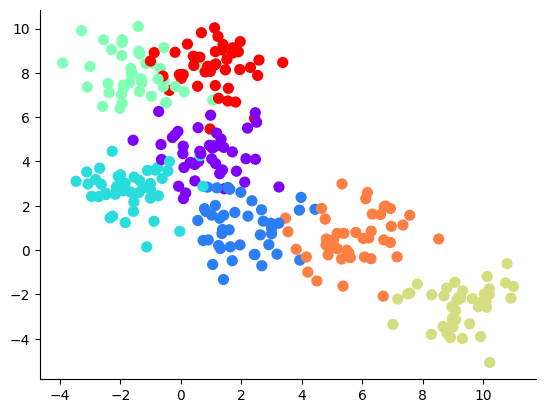

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=7,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

The following diagram shows the number of data.

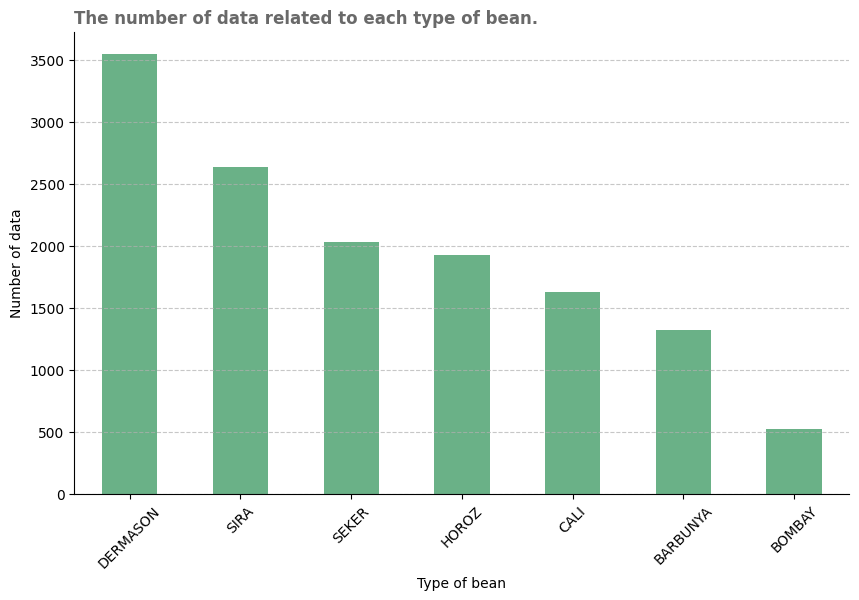

In [ ]:
import matplotlib.pyplot as plt

# Number of data for each class
class_counts = dataset['Class'].value_counts()

plt.figure(figsize=(10, 6))
bar_plot = class_counts.plot(kind='bar', color='#6AB187')
plt.title('The number of data related to each type of bean.', color="dimgray", fontsize=12, loc="left", weight="bold")
plt.xlabel('Type of bean')
plt.ylabel('Number of data')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The graphs below show the distribution of each feature. In these graphs, the x-axis represents the numerical feature values and the y-axis represents the different classes in your dataset.

These diagrams show the relationship between each of the numerical features and classes. Also, these charts can help to better understand the data and choose the right features for modeling.

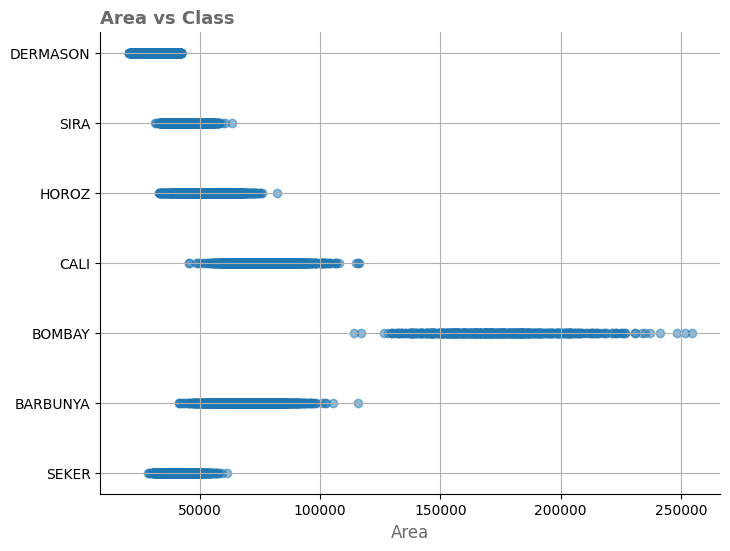

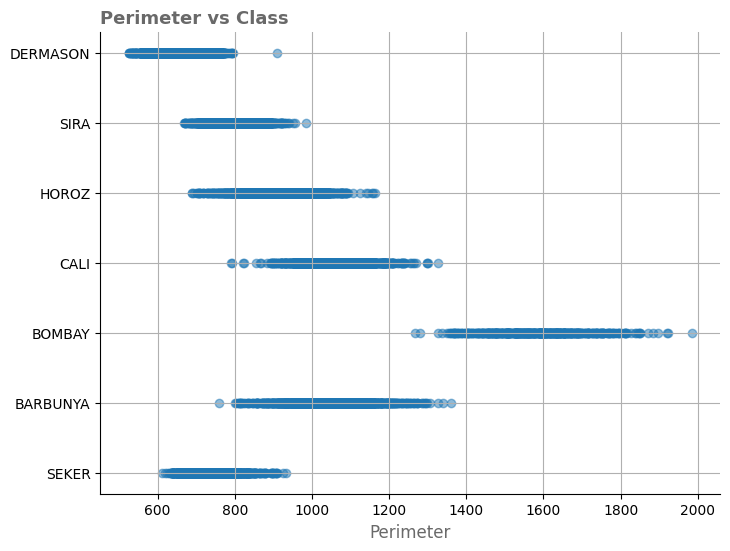

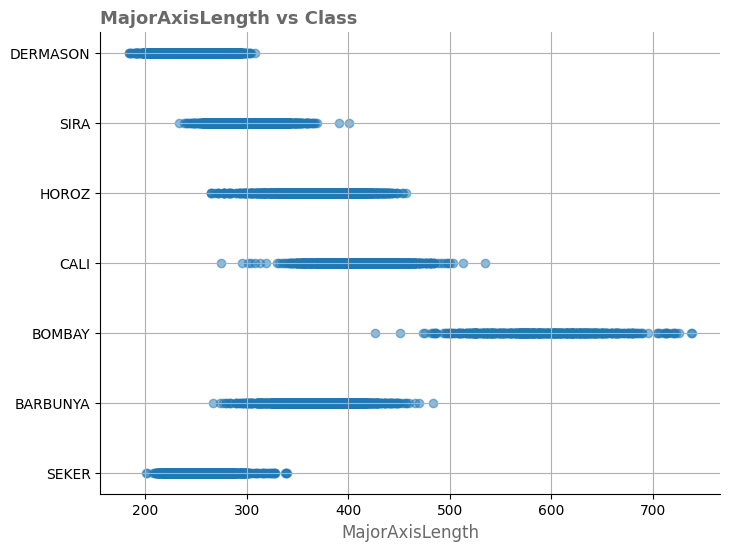

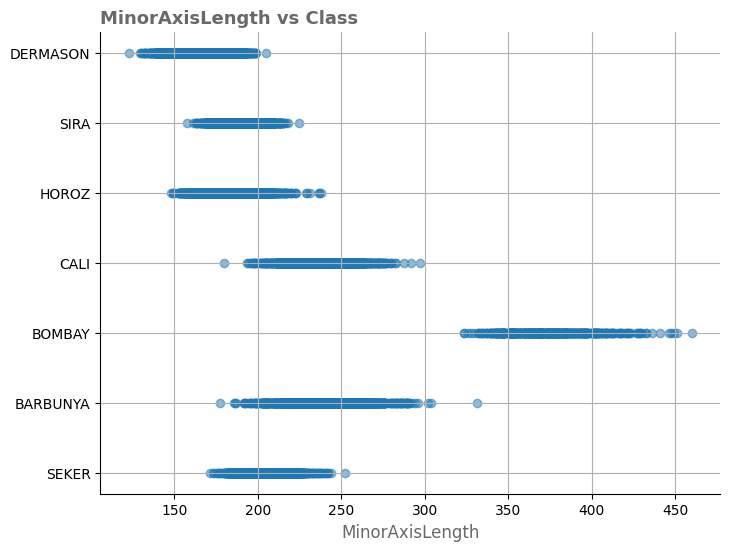

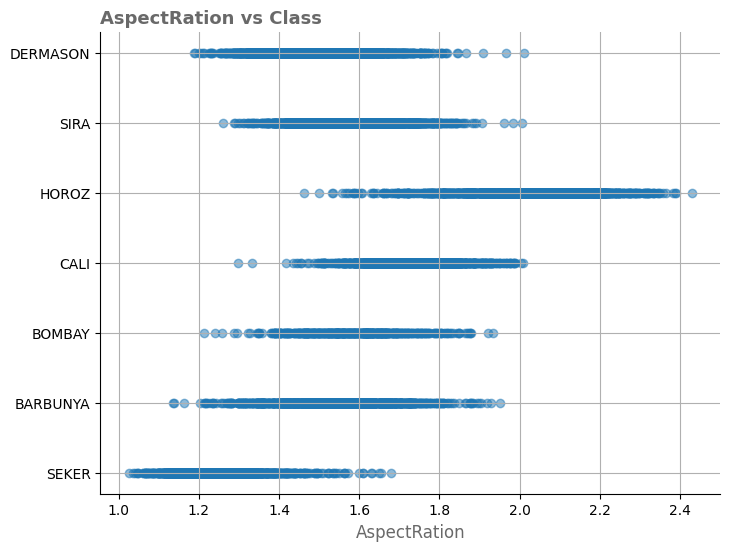

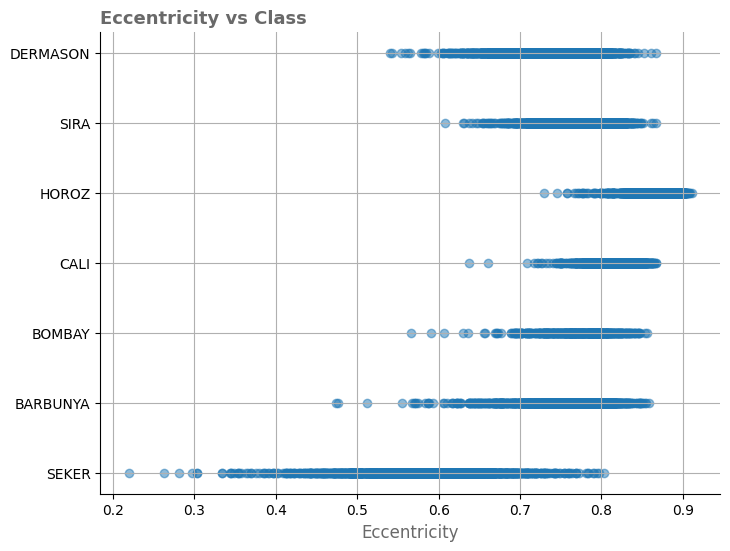

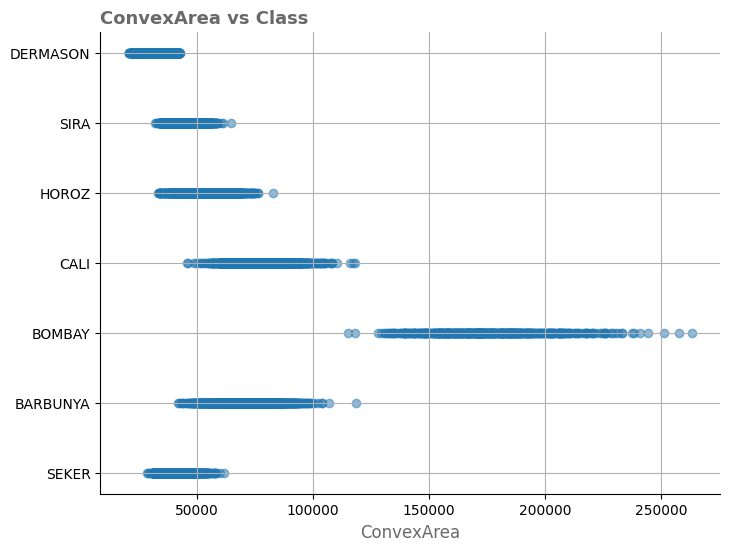

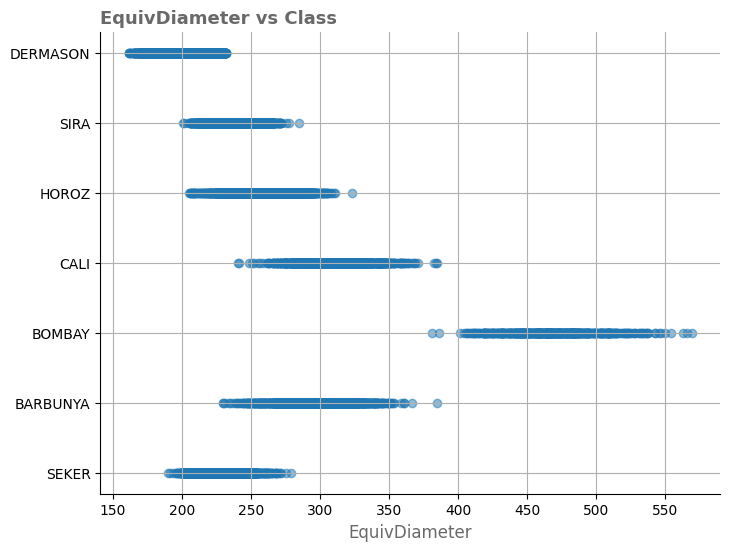

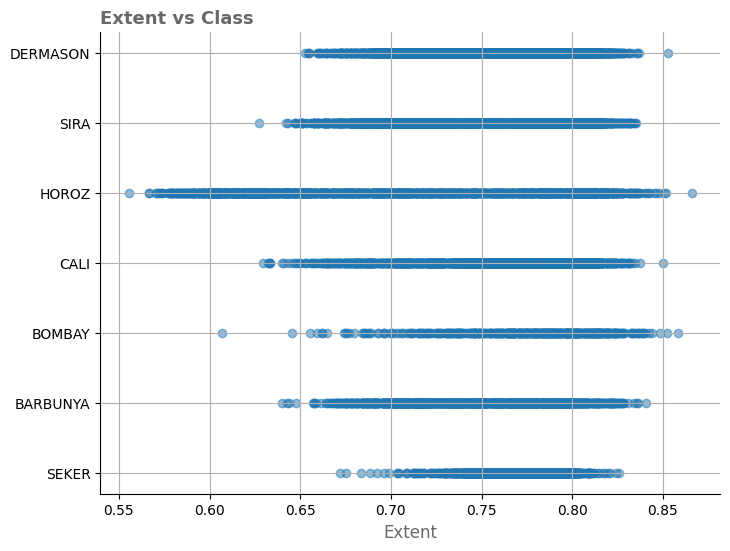

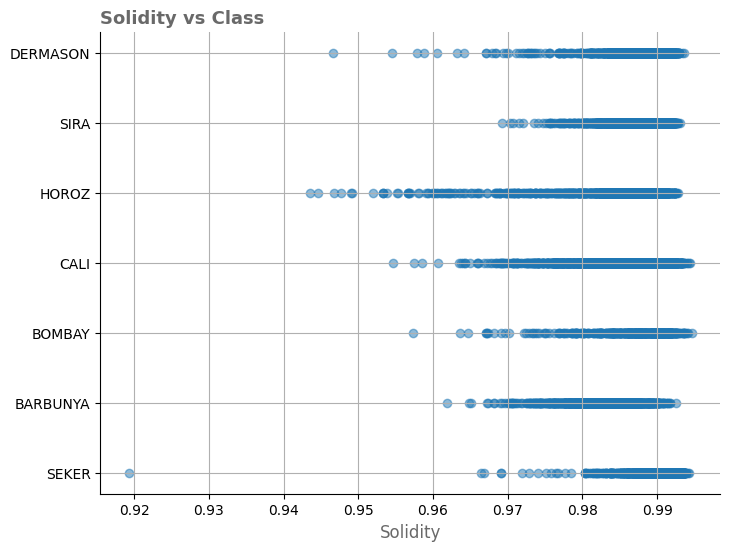

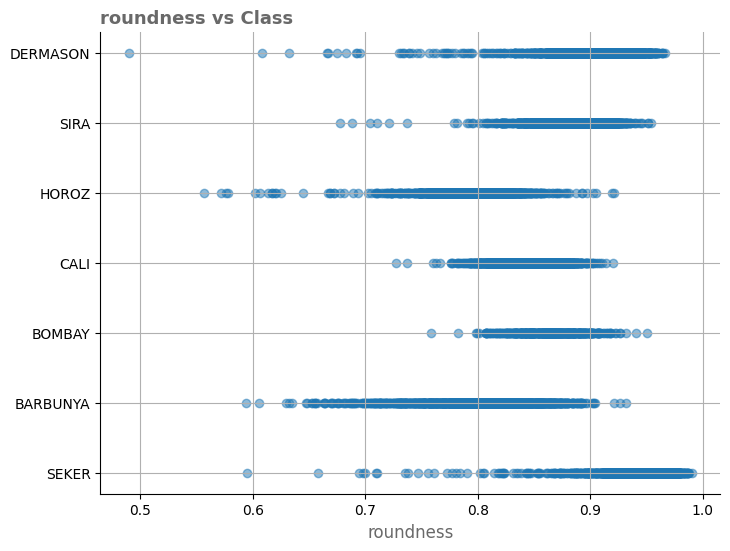

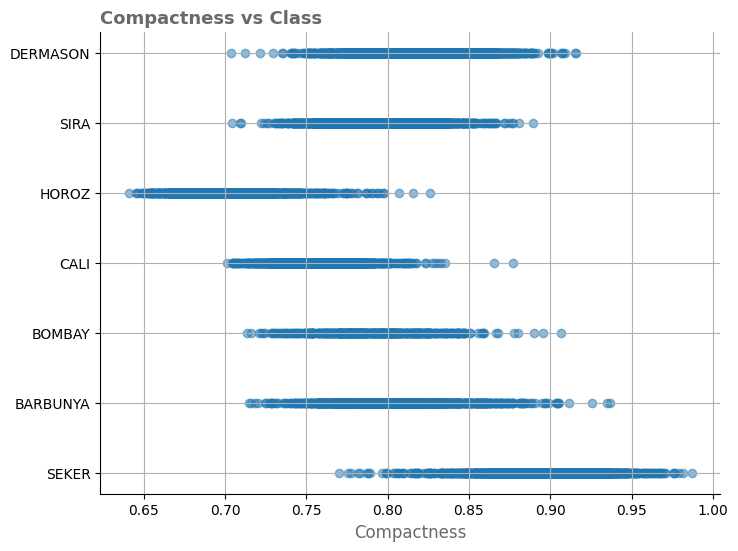

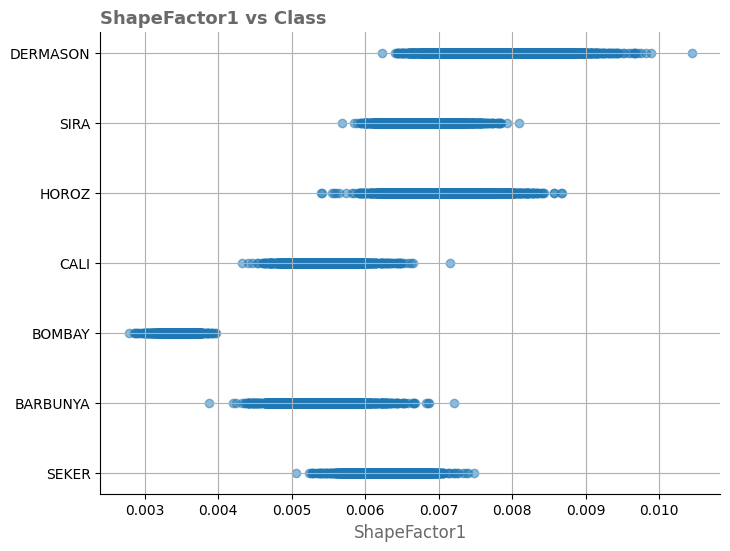

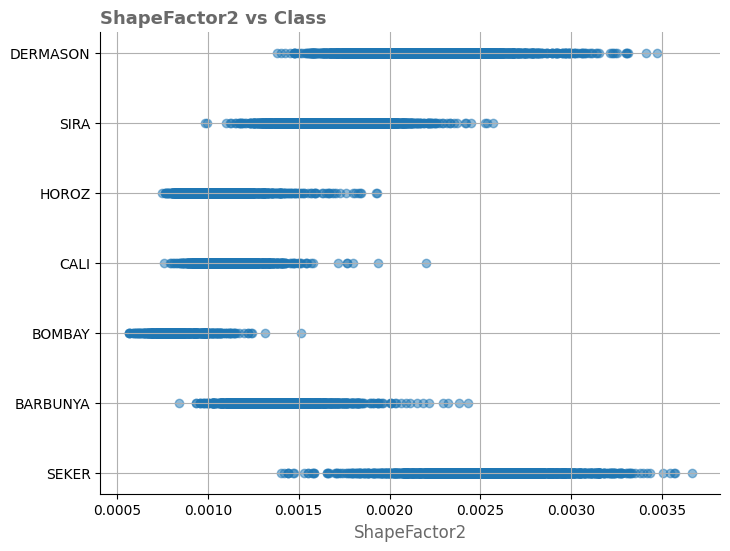

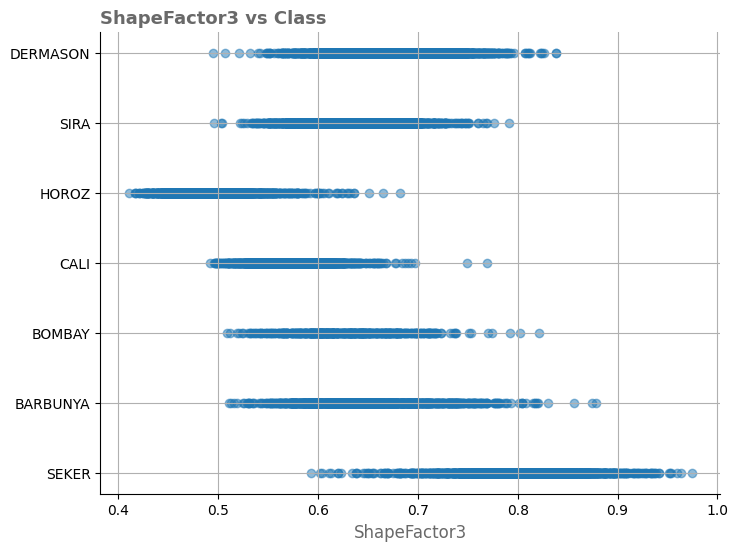

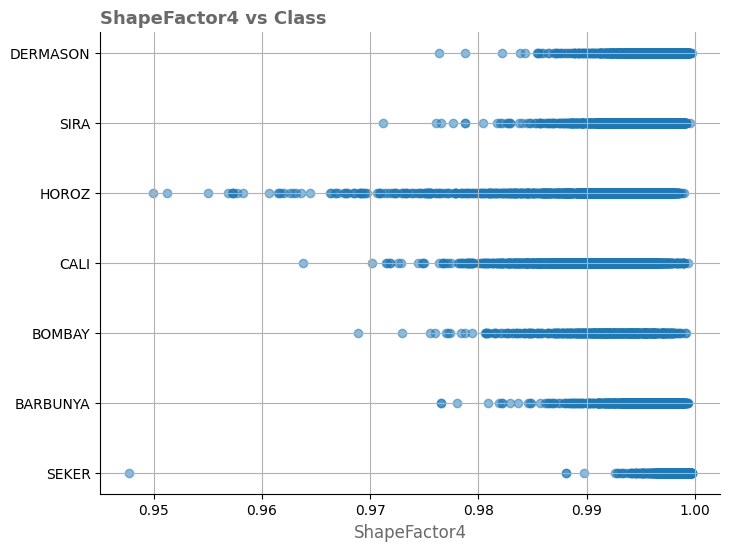

In [4]:
for label in dataset.columns[0:-1]:
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[label], dataset['Class'], alpha=0.5)
    plt.xlabel(label, color="dimgray", fontsize=12)
    plt.title(label + ' vs Class', color="dimgray", fontsize=13, loc="left", weight="bold")

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(True)
    plt.show()

# **Preprocessing and Feature Engineering**

Preprocessing and feature engineering are two important steps in data analysis where inputs are processed and transformed into a form suitable for models after loading and before being used in machine models or other analysis. In the preprocessing step, the input data is cleaned and organized into a standard form. In the feature engineering phase, new features are extracted or transformed from the data that provide the models with the best information related to the problem at hand.

In this section, the StandardScaler class from the sklearn.preprocessing library is used to standardize the data. Data standardization means changing the data scale so that their mean is zero and their variance is one. This causes all features to be rescaled to the same scale, thereby improving machine learning models.

The formula of this method of normalization is as follows:
$$ x^\prime = \frac{x - \mu}{σ}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

# Data normalization using the standard scaler method
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.drop('Class', axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=dataset.columns[:-1])
df_scaled['Class'] = dataset['Class']

# Data storage after preprocessing and feature engineering
df_scaled.to_csv("preprocessed_data.csv", index=False)

df_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER


**minmaxscaler** class can also be used for data normalization. In this class, all data values are between zero and one.
The formula of this method of normalization is as follows:
$$x^\prime = \frac{x - min(x)}{max(x) - min(x)}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Data normalization using the MinMax scaler method
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset.drop('Class', axis=1))
df_MinMaxScaler = pd.DataFrame(scaled_data, columns=dataset.columns[:-1])
df_MinMaxScaler['Class'] = dataset['Class']

df_MinMaxScaler.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,SEKER
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979,SEKER
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,SEKER
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,SEKER
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,SEKER


The **standard scaler** method will be used in this project.




---



In the feature engineering section to remove redundant information, according to the diagram above, none of the features are the same types, so it is better not to remove any of the features here manually. Of course, in the next section, the data dimensions are reduced using the **PCA** algorithm.

It is also possible to extract important features such as geometric features, color, texture, etc. from this data. Some new features can provide more information from the data to the model, but it should be noted that more features may make the model redundant and inefficient. Therefore, it is very important to choose the main and appropriate features and model them

After performing data preprocessing and feature engineering, the new data will be stored for use in the machine learning model.

In [ ]:
# Load the dataset
preprocessed_data = pd.read_csv('preprocessed_data.csv')

# Check the first few rows of the dataframe
preprocessed_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER


**Principal Component Analysis(PCA):**

PCA is used as a dimensionality reduction method to analyze data and reduce the complexity of machine models for high-dimensional data. This method allows us to identify important features of the data and train predictive models using only these features. Below are several applications of PCA:


*   Dimensionality reduction: By transforming a high-dimensional data set into a principal component space determined by the principal components with the largest variance, we can significantly reduce the number of dimensions, thereby reducing the amount of computation.
*   Data visualization: PCA can be used to visualize high-dimensional data to reduce it to two or three dimensions so that we can display it in two-dimensional or three-dimensional graphs and visualize patterns in the data.


*   Removal of duplicate data: PCA can identify duplicate data or variables that do not actually have additional information and remove these variables.
*   Improving the efficiency of models: PCA can increase the training time and prediction efficiency of machine learning models by reducing the number of features.











In [ ]:
from sklearn.decomposition import PCA

# Separate features and labels
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # We choose 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

The diagram below shows the distribution of the data on which the PCA algorithm was implemented.

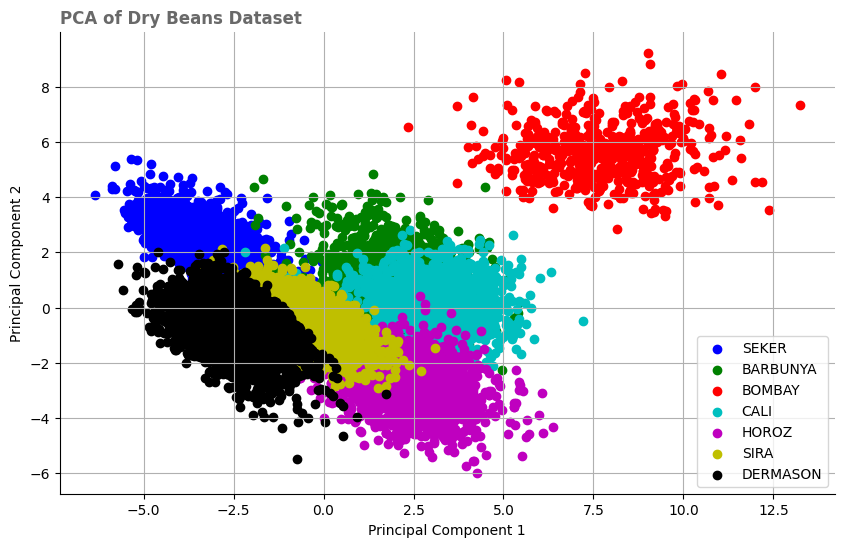

In [ ]:
# Plot the PCA result
plt.figure(figsize=(10, 6))
targets = dataset['Class'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('PCA of Dry Beans Dataset', color="dimgray", fontsize=12, loc="left", weight="bold")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid()
plt.show()


# **Segmentation of training and test data**

**1. Separating Features and Labels:**      
First, we divide the data into two main parts: features and labels or classes. Features are typically a set of input features that the model uses to predict labels. Labels indicate the desired response or output of the model.     
**2. Separation of Training and Test Data:**            
Then, the data is divided into two subsets: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model's performance on previously unseen data.

In this part, train_test_split is a function of scikit-learn which is used to randomly split the data into two subsets of training and testing. Finally, this function returns four subsets as output: X_train and y_train, which contain the training set, and X_test and y_test, which contain the test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X_pca = dataset.drop('Class', axis=1)
y = dataset['Class']

# Separation of training and test data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# **Modeling the first part (SVM model)**

**Support Vector Machine (SVM)** algorithm is used in this section.

**GridSearchCV :** A very useful algorithm used to select the best parameters for a model. In machine learning, the selection and adjustment of parameters are very important in the performance of the model, and their correct selection can significantly improve the performance of the model.   
One of the key concepts in this algorithm is the parameter space. This concept includes a set of all adjustable parameters for a particular model. Usually, this space is presented as a dictionary whose keys are the names of the parameters and their values as a list of possible values for each parameter. Another concept is Cross-Validation. cv is used to evaluate the performance of the model with each combination of parameters, a cross-sectional distribution is used. This means dividing the data into several parts, then training the model on one part and evaluating its performance on the other part. The default value of this division is generally 3 or 5, but it can be changed manually.
   
cv here is kfold by default. Among its advantages, the following points can be mentioned::


*   This method divides the data into k folds.
*   The model is trained k times and each time one part is used as test data and other parts are used as training data.


*   This method ensures that each data is used at least once in the test data and also the average accuracy and performance of the model is adjusted on the data.
*   This method is usually used to accurately evaluate thermomodels and adjust parameters, as it provides more test information.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Model definition
model = SVC()

# Defining the parameters space for GridSearchCV
param_grid = {
    'kernel': ['linear','poly', 'sigmoid', 'rbf'],
    'C': [0.1, 1, 10],
    'gama':[0.01, 0.1, 1]
}

# Create GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3)

#Model training
grid.fit(X_train, y_train)

# The best model and parameters
best_model = grid.best_estimator_
best_params = grid.best_params_
print("Best Model:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)

Gama parameter is not suitable for linear kernel.

In [ ]:
from sklearn.svm import SVC

model_1 = SVC(kernel='linear', C=0.1)

Then the model is trained and the best model and its parameters are obtained. In the next section, the prediction for the test data will be done with the optimized model.

In [ ]:
model_1.fit(X_train, y_train)
y_model = model_1.predict(X_test)

**classification_report :** This function provides a comprehensive report of various evaluation criteria for the classification model. This report includes criteria such as precision, recall, F1 score and other criteria related to each categorized class. In this way, for each class, values of accuracy, recall, F1 score and number of samples of each class (if specified) are reported. This report is useful to better understand the performance of the model on each classified class and evaluate its strengths and weaknesses.

**accuracy_score :** This metric is simpler and only measures the overall classification accuracy of the model. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. This measure is useful as a quick measure to evaluate the overall performance of the model, but it does not give us more information about the performance of the model on each class.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Prediction with the best model
y_pred = model_1.predict(X_test)

# Display the accuracy report
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.91      0.95      0.93       317
    DERMASON       0.90      0.90      0.90       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.86      0.87      0.86       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Accuracy Score: 0.9184722732280572


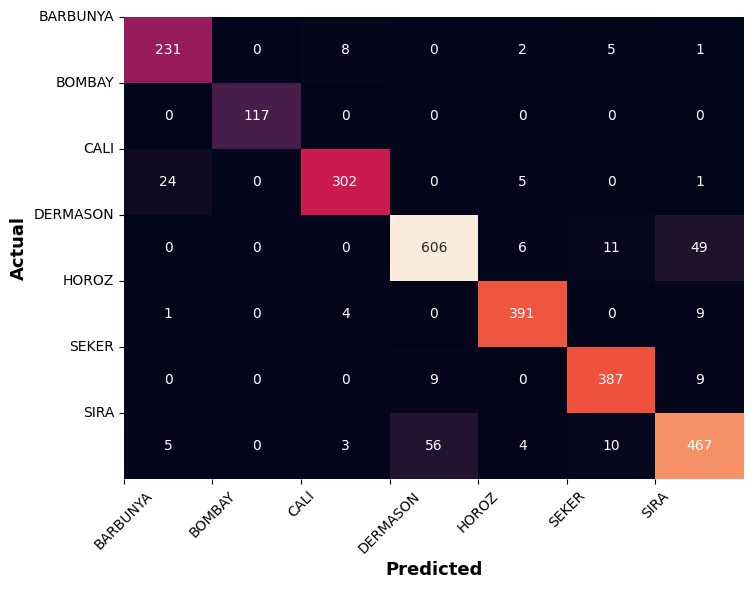

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.xticks(ticks=range(len(cm)), labels=model_1.classes_, rotation=45)
plt.yticks(ticks=range(len(cm)), labels=model_1.classes_, rotation=0)
plt.xlabel('Predicted', fontsize=13, weight="bold")
plt.ylabel('Actual', fontsize=13, weight="bold")
plt.show()


# **Modeling the second part (RandomForest model)**

This algorithm is a popular method for classification problems in machine learning based on the idea of a set of decision trees known as random forests.

This algorithm trains a number of decision trees in parallel and, after training, passes the new input through each of the trees and combines the results to provide a final prediction.


RandomForestClassifier is a robust algorithm that reduces the phenomenon of overfitting and is resistant to noisy data. Due to its ability to perform parallel processing and combination of multiple decision trees, it is commonly used as an effective tool for classification problems in various problems.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model definition
model = RandomForestClassifier()

# Defining the parameters space for GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
}

# Create GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3)

#Model training
grid.fit(X_train, y_train)

# The best model and parameters
best_model = grid.best_estimator_
best_params = grid.best_params_
print("Best Model:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)

Best Model: RandomForestClassifier(n_estimators=500)
Best Parameters: {'n_estimators': 500}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=500)

In [ ]:
model_2.fit(X_train, y_train)
y_model = model_2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Prediction with the best model
y_pred = model_2.predict(X_test)

# Display the accuracy report
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.94      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.87      0.88      0.88       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Accuracy Score: 0.9243481454278369


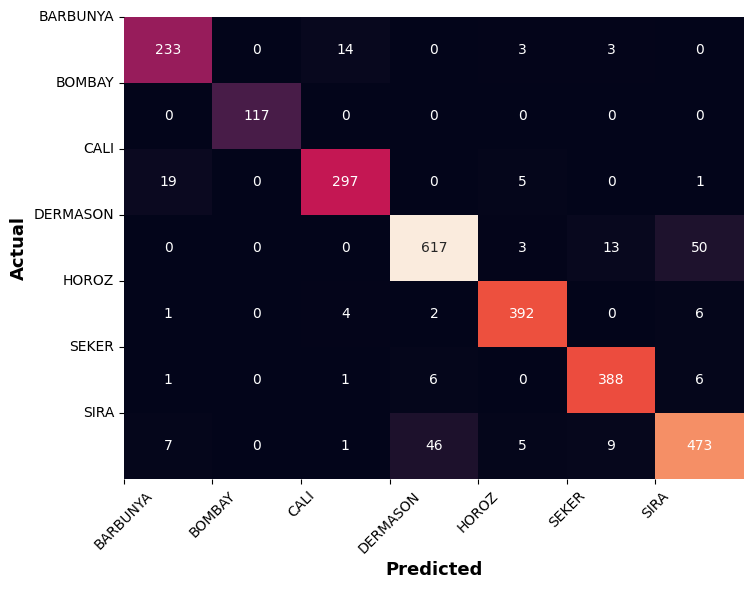

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.xticks(ticks=range(len(cm)), labels=model_2.classes_, rotation=45)
plt.yticks(ticks=range(len(cm)), labels=model_2.classes_, rotation=0)
plt.xlabel('Predicted', fontsize=13, weight="bold")
plt.ylabel('Actual', fontsize=13, weight="bold")
plt.show()


# **Modeling the third part (KNN model)**

This algorithm is a famous algorithm for classification and regression problems. The working principle of this algorithm is very simple and it works based on the idea of neighborhood.

In the KNN algorithm, to predict the label or value of a new point, we first select K points adjacent to that point. Then, based on the majority of labels or average values, we determine the label or value of the new point.

KNN is simple and understandable and widely used in various problems such as image, text, and audio data classification. But the point that should be considered is the effect of the K parameter on the quality and performance of the model. Using an appropriate value for K can help improve the accuracy of predictions.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Model definition
model = KNeighborsClassifier()

# Defining the parameters space for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1,9),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3)

#Model training
grid.fit(X_train, y_train)

# The best model and parameters
best_model = grid.best_estimator_
best_params = grid.best_params_
print("Best Model:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)


Best Model: KNeighborsClassifier(n_neighbors=1)
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 1}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors=1, algorithm='auto')

In [ ]:
model_3.fit(X_train, y_train)
y_model = model_3.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Prediction with the best model
y_pred = model_3.predict(X_test)

# Display the accuracy report
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.50      0.46      0.48       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.63      0.67      0.65       317
    DERMASON       0.82      0.85      0.83       671
       HOROZ       0.79      0.76      0.78       408
       SEKER       0.81      0.71      0.76       413
        SIRA       0.71      0.76      0.74       536

    accuracy                           0.75      2723
   macro avg       0.75      0.75      0.75      2723
weighted avg       0.75      0.75      0.75      2723

Accuracy Score: 0.7469702533969886


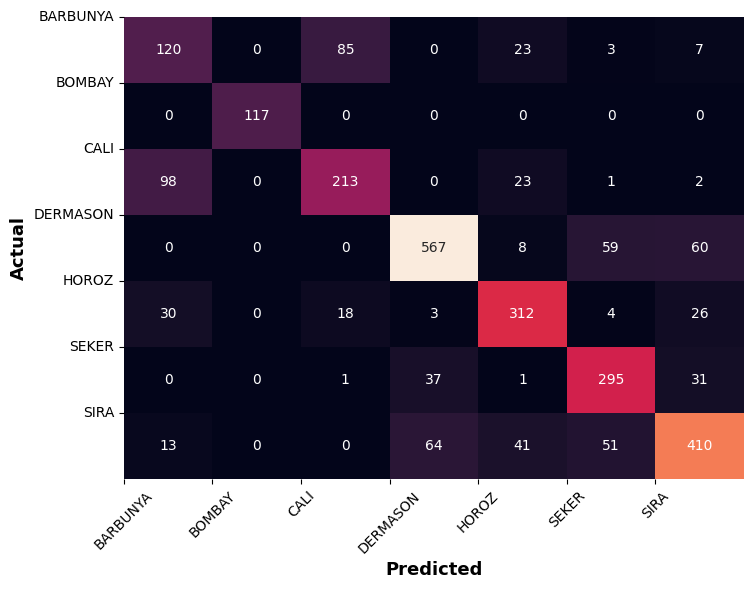

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.xticks(ticks=range(len(cm)), labels=model_3.classes_, rotation=45)
plt.yticks(ticks=range(len(cm)), labels=model_3.classes_, rotation=0)
plt.xlabel('Predicted', fontsize=13, weight="bold")
plt.ylabel('Actual', fontsize=13, weight="bold")
plt.show()

# **Conclusion:**


According to the reviews and results, the accuracy of the SVC model is approximately 0.918, the accuracy of the RandomForest model is approximately 0.924, and the accuracy of the KNN model is approximately 0.747, so the best algorithm for this data is **RandomForest**.